# DST Inclino + RBR data


Need to join on common time line early

Geometry: 

$h = L \times sin(\theta)$

$h = dx \times tan(\theta)$

$h$ is the depth (of the RBR)

$L$ is the length between the RBR and the surface

$\theta$ is tilt_x measured by inclinos


Enregistreur:
H775 - H776 - 82905

Source:
H777 - H778 - H779 - 82908

[comment]: <> (This is a comment, it will not be included)



In [1]:
import os, sys, pickle, glob
#import csv
import numpy as np
import matplotlib.pyplot as plt

import datetime

import pandas as pd

# cognac data and tools
import cognac.insitu as insi

# load campaign
cp = insi.utils.campaign('microco_leg2.yaml')

---

# enregistreur: inclino

In [6]:
# data directory and filename
#
data_dir = cp['enregistreur'].path+'inclino/'

dst = ['H0775','H0776']
dep = [18, 8] # found in INI files

files = [data_dir+str(ldep)+ldst+'.DAT' for ldst, ldep in zip(dst, dep)]
_ = [print(f) for f in files]

/Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/enregistreur/inclino/18H0775.DAT
/Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/enregistreur/inclino/8H0776.DAT


In [4]:
d = insi.inclino.inclino(files[0], dayfirst=True)
print('Start time: ', d['time'][0])
print('End time: ', d['time'][-1])
print('Deployment length: ', d['time'][-1]-d['time'][0])

Start time:  2018-09-09 15:26:00
End time:  2018-09-10 03:32:34
Deployment length:  0 days 12:06:34


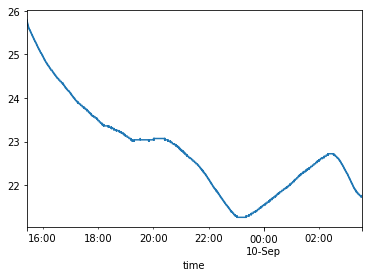

In [4]:
d['temperature'].plot()
# date format is different than for leg1

In [5]:
# Deployments from logs
print(cp['enregistreur']['d1'])

--
Deployment label: d1
Start:
-
Event label: start
Time: 
2018-09-11 06:08:00
Lon:6.198671666666667 = 6.0deg 11.920300000000008
Lat:42.87725833333333 = 42.0deg 52.63549999999981

End:
-
Event label: end
Time: 
2018-09-11 07:33:00
Lon:6.172086666666667 = 6.0deg 10.325200000000017
Lat:42.876378333333335 = 42.0deg 52.5827000000001




The code below is useless: we set a sampling rate of 1Hz which allows deployments of 12h.

We should have used a sampling rate of 0.1Hz

In [ ]:
# load data
I=[]
for i in range(len(rec)):
    I.append([insi.utils.inclino(f).trim(d=rec[i]) for f in files])

In [12]:
print(I[0][0].iloc[:10])

Empty DataFrame
Columns: [sample, temp, depth, tilt_x, tilt_y, tilt_z, EAL]
Index: []


---

# enregistreur RBR 

In [2]:
data_dir = cp['enregistreur']['path']+'rbr/'

rbr = '082905_20180915_1238'
file = data_dir+rbr+'/'+rbr+'\\'+rbr+'_data.txt'
print(file)

/Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/enregistreur/rbr/082905_20180915_1238/082905_20180915_1238\082905_20180915_1238_data.txt


In [3]:
# load data
R={}
for d in cp['enregistreur']:
    R[d.label] = insi.rbr.rbr(file).trim(d=d)

In [4]:
R['d1'].d.head()

,temperature,pressure,sea_pressure,depth
time,,,,
2018-09-11 06:13:00,14.577524,61.560315,51.427814,51.111816
2018-09-11 06:13:01,14.576781,61.613836,51.481335,51.165008
2018-09-11 06:13:02,14.577385,61.241708,51.109207,50.795166
2018-09-11 06:13:03,14.580068,61.417593,51.285092,50.969971
2018-09-11 06:13:04,14.578567,61.449385,51.316884,51.001568


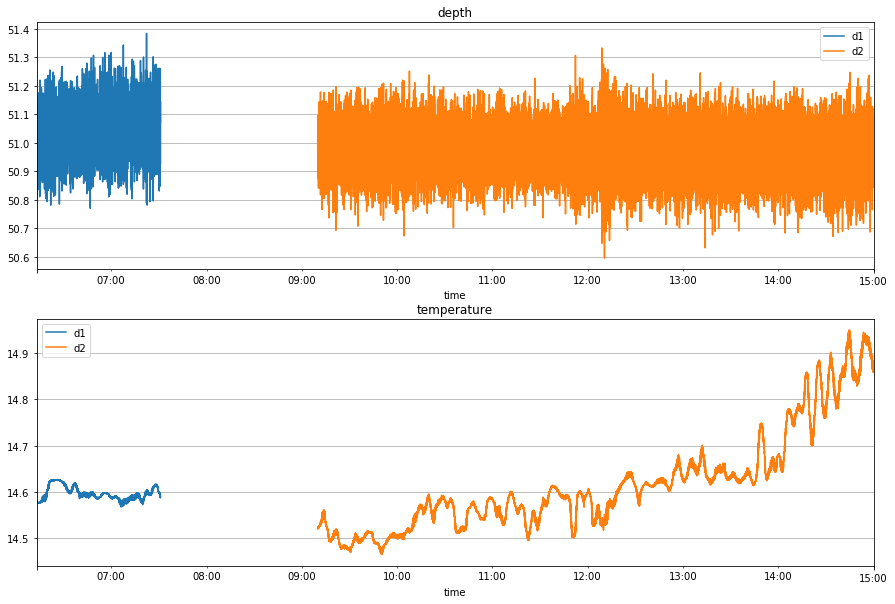

In [5]:
fig = plt.figure(figsize=(15,10))

# depth
ax = plt.subplot(211)
for i, r in R.items():
    r['depth'].plot(ax=ax, label=i)
    ax.set_title(r['depth'].name)    
    ax.grid()
    ax.legend()
        
# temperature
ax = plt.subplot(212)
for i, r in R.items():
    r['temperature'].plot(ax=ax, label=i)
    ax.set_title(r['temperature'].name)    
    ax.grid()  
    ax.legend()

In [6]:
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

output_notebook()

TOOLS = 'pan,wheel_zoom,box_zoom,reset,help'

# subsample and compute speed
dep = 'd1'
d = R[dep].d.resample('1T').mean()
# 1T = 1 minute, 30S = 30 seconds
#print(d)
r = cp['enregistreur'][dep]

# create a new plot and add a renderer
s1 = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None, 
              x_axis_type='datetime')
s1.line('time', 'temperature', source=d)
s1.add_tools(HoverTool(
    tooltips=[('time','@time{%T}'),('temperature','@{temperature}{%0.4f}'),],
    formatters={'time': 'datetime','temperature' : 'printf',},
    mode='vline'
    ))
    
s2 = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None, 
               x_axis_type='datetime', x_range=s1.x_range)
s2.line('time', 'depth', source=d)
s2.add_tools(HoverTool(
    tooltips=[('time','@time{%T}'),('depth','@{depth}{%0.4f}'),],
    formatters={'time': 'datetime','depth' : 'printf',},
    mode='vline'
    ))

p = gridplot([[s1, s2]])

show(p)

Loading BokehJS ...

---

# enregistreur: store data

In [7]:
for i, r in R.items():
    r.to_pickle(i)

Data store to d1.p
Data store to d2.p


In [8]:
# load and plot
r = insi.rbr.rbr('d1.p')

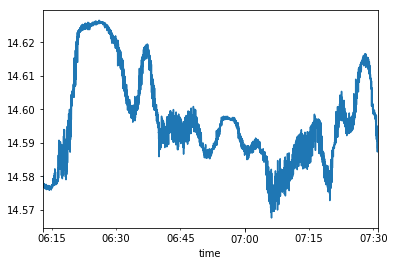

In [10]:
r['temperature'].plot()

---
# old stuff, that may turn out useful

In [2]:
# data directory and filename
#
data_dir = '../data/inclinos/'

dst = ['H0775','H0776', 'H0777','H0778', 'H0779']
dep = [15, 6, 5, 10, 3] # found in INI files

files = [data_dir+ldst+'/'+str(ldep)+ldst+'.DAT' for ldst, ldep in zip(dst, dep)]

In [4]:
# load data
I=[]
for i in range(len(rec)):
    I.append([insi.utils.inclino(f).trim(d=rec[i]) for f in files])

In [5]:
print(I[0][1].iloc[:10])

                     sample   temp  depth  tilt_x  tilt_y  tilt_z  EAL
2018-04-13 06:00:00   25201  13.80  47.74     -86       0       4    1
2018-04-13 06:00:10   25202  13.80  48.22     -81       4       5    1
2018-04-13 06:00:20   25203  13.80  47.74     -81       2       7    1
2018-04-13 06:00:30   25204  13.80  48.22     -83       2       5    1
2018-04-13 06:00:40   25205  13.80  48.22     -83       3       4    1
2018-04-13 06:00:50   25206  13.77  47.75     -82       2       6    1
2018-04-13 06:01:00   25207  13.80  47.74     -86       0       4    0
2018-04-13 06:01:10   25208  13.77  47.75     -82       3       5    1
2018-04-13 06:01:20   25209  13.77  47.75     -82       2       7    1
2018-04-13 06:01:30   25210  13.77  47.27     -81       5       4    1


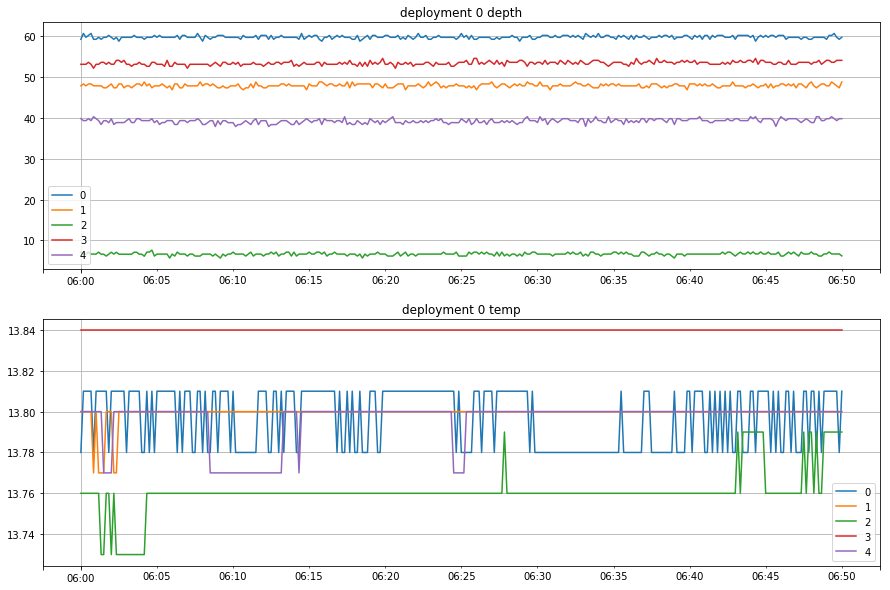

In [16]:
id = 0

fig = plt.figure(figsize=(15,10))

# depth
ax = plt.subplot(211)
for idx, i in enumerate(I[id]):
    i.depth.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.depth.name)        
    ax.grid()
    ax.legend()
        
# temperature
ax = plt.subplot(212)
for idx, i in enumerate(I[id]):
    i.temp.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.temp.name)        
    ax.grid()
    ax.legend()

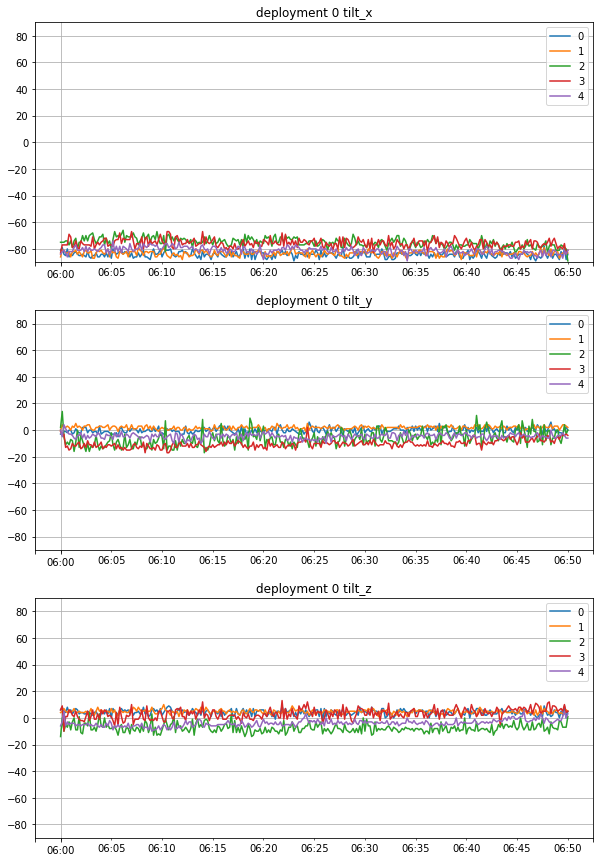

In [17]:
# tilts
fig = plt.figure(figsize=(10,15))

# tilt x
ax = plt.subplot(311)
for idx, i in enumerate(I[id]):
    i.tilt_x.plot(ax=ax, label=str(idx))
    ax.set_title(i.tilt_x.name)
    ax.set_title('deployment '+str(id)+' '+i.tilt_x.name)
    ax.set_ylim(-90,90)    
    ax.grid()
    ax.legend()
        
# tilt y
ax = plt.subplot(312)
for idx, i in enumerate(I[id]):
    i.tilt_y.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.tilt_y.name)
    ax.set_ylim(-90,90)    
    ax.grid()
    ax.legend()
    
# tilt z
ax = plt.subplot(313)
for idx, i in enumerate(I[id]):
    i.tilt_z.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.tilt_z.name)
    ax.set_ylim(-90,90)    
    ax.grid()
    ax.legend()

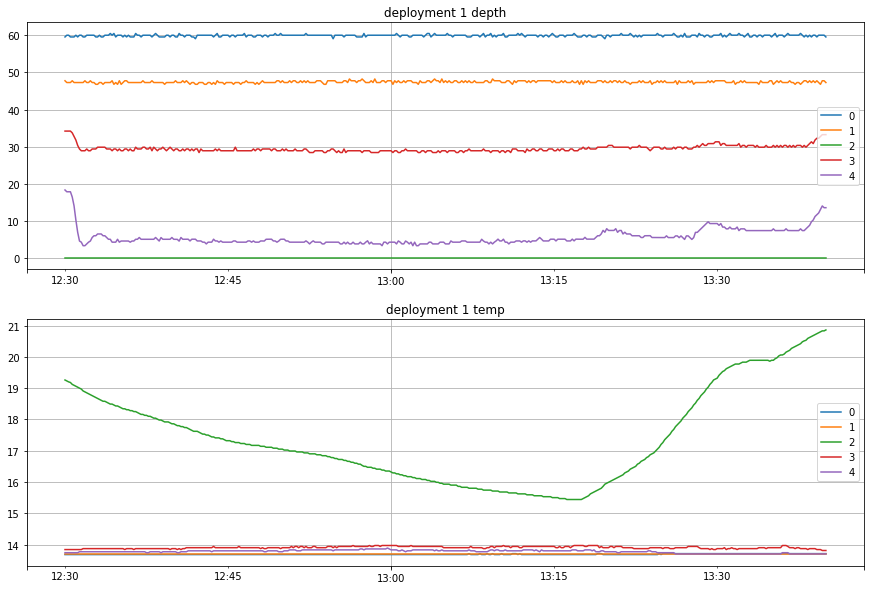

In [18]:
id=1

fig = plt.figure(figsize=(15,10))

# depth
ax = plt.subplot(211)
for idx, i in enumerate(I[id]):
    i.depth.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.depth.name)        
    ax.grid()
    ax.legend()
        
# temperature
ax = plt.subplot(212)
for idx, i in enumerate(I[id]):
    i.temp.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.temp.name)        
    ax.grid()
    ax.legend()

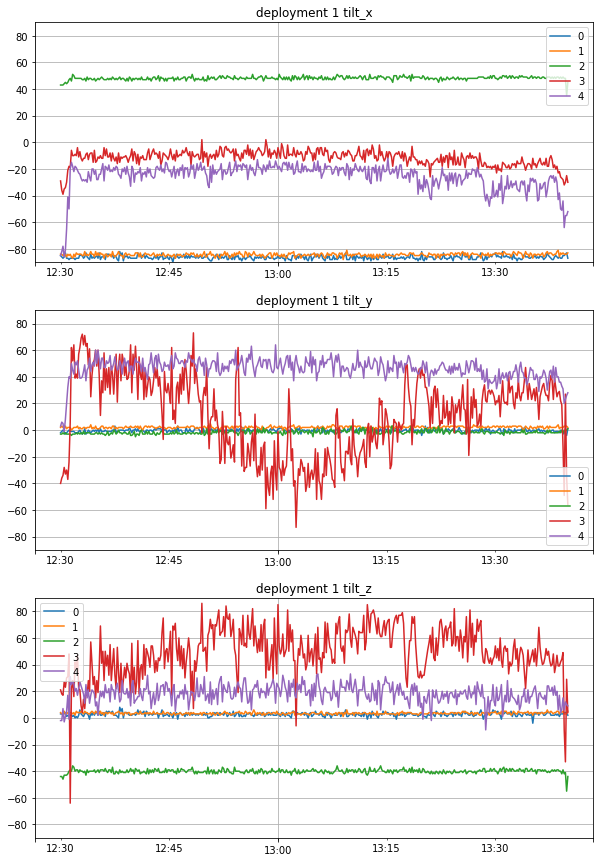

In [19]:
# tilts
fig = plt.figure(figsize=(10,15))

# tilt x
ax = plt.subplot(311)
for idx, i in enumerate(I[id]):
    i.tilt_x.plot(ax=ax, label=str(idx))
    ax.set_title(i.tilt_x.name)
    ax.set_title('deployment '+str(id)+' '+i.tilt_x.name)
    ax.set_ylim(-90,90)    
    ax.grid()
    ax.legend()
        
# tilt y
ax = plt.subplot(312)
for idx, i in enumerate(I[id]):
    i.tilt_y.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.tilt_y.name)
    ax.set_ylim(-90,90)    
    ax.grid()
    ax.legend()
    
# tilt z
ax = plt.subplot(313)
for idx, i in enumerate(I[id]):
    i.tilt_z.plot(ax=ax, label=str(idx))
    ax.set_title('deployment '+str(id)+' '+i.tilt_z.name)
    ax.set_ylim(-90,90)    
    ax.grid()
    ax.legend()

---

# join data sets

In [38]:
R = []
for i in range(len(rec)):
    j = R[i][0].d.resample('10s').mean().add_suffix('_r').join(I[i][0].d.add_suffix('_0'))
    j = j.join(I[i][1].add_suffix('_1'))
    D.append(j)

In [41]:
D[0].iloc[:5]

,temp_r,pressure_r,sea_pressure_r,depth_r,sample_0,temp_0,depth_0,tilt_x_0,tilt_y_0,tilt_z_0,EAL_0,sample_1,temp_1,depth_1,tilt_x_1,tilt_y_1,tilt_z_1,EAL_1
2018-04-13 06:00:00,13.774912,60.096659,49.964158,49.657153,25201,13.78,59.11,-81,-3,6,1,25201,13.8,47.74,-86,0,4,1
2018-04-13 06:00:10,13.775526,60.167905,50.035404,49.727961,25202,13.81,60.54,-79,-3,8,1,25202,13.8,48.22,-81,4,5,1
2018-04-13 06:00:20,13.775142,60.131197,49.998696,49.691479,25203,13.81,59.59,-84,-1,5,1,25203,13.8,47.74,-81,2,7,1
2018-04-13 06:00:30,13.775938,60.260736,50.128235,49.820222,25204,13.81,60.06,-85,-1,4,1,25204,13.8,48.22,-83,2,5,1
2018-04-13 06:00:40,13.778623,60.265035,50.132534,49.824495,25205,13.81,60.54,-80,-2,8,1,25205,13.8,48.22,-83,3,4,1


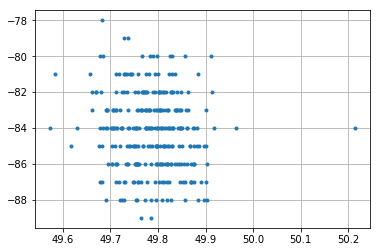

In [43]:
id = 0

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(D[id].depth_r, D[id].tilt_x_0,'.')
ax.set_xlabel('depth rbr')
ax.set_ylabel('tilt x')
ax.grid()

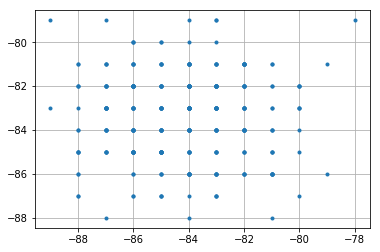

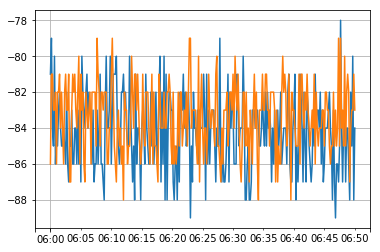

In [45]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(D[id].tilt_x_0, D[id].tilt_x_1,'.')
ax.grid()

fig = plt.figure()
ax = plt.subplot(111)
D[id].tilt_x_0.plot(ax=ax)
D[id].tilt_x_1.plot(ax=ax)
ax.grid()


array([<matplotlib.axes._subplots.AxesSubplot object at 0xd12615c50>,
      dtype=object)

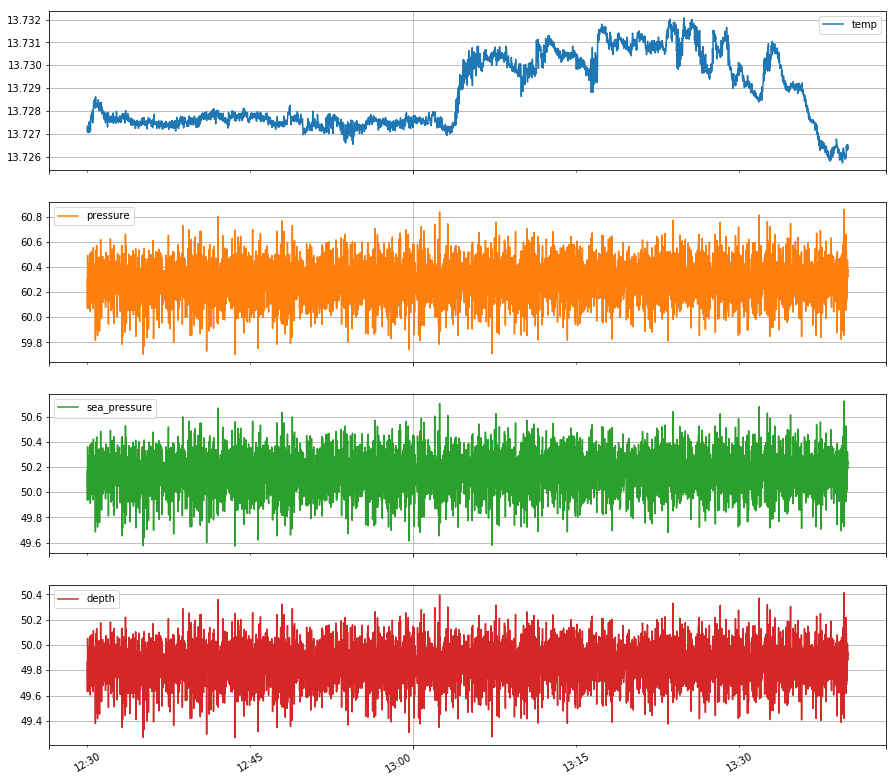

In [14]:
R[0].plot(subplots=True, figsize=(15,15), grid=True)

---

In [6]:
%load_ext autoreload

In [7]:
# Reload all modules (except those excluded by %aimport) automatically now.
%autoreload
#from data import *